In [ ]:
import pickle
import os
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.util import ngrams
import kagglehub

In [ ]:
path = kagglehub.dataset_download("tisdang/pps-data")
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/pps-data


In [ ]:
llm_path = os.path.join(path, 'llm')

# Load data
with open(os.path.join(llm_path, 'train_data.pkl'), 'rb') as f:
    train_data = pickle.load(f)

print(train_data.head())

                                                    text  labels
25372  In the time since Justice Antonin Scalia’s pas...       1
17129  Rachel Dolezal, a former NAACP leader and prof...       1
45695  PARIS  —   At the end of the Jean Paul Gaultie...       1
56576  A Catholic apple grower in Michigan has been b...       1
18184  Iraqi forces are about to launch an offensive ...       1


In [ ]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 47169 entries, 25372 to 36288
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47154 non-null  object
 1   labels  47169 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB
None


In [ ]:
print(train_data.describe())

             labels
count  47169.000000
mean       0.445716
std        0.497050
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [ ]:
# Check null values
print("number of null rows in train set:", train_data['text'].isnull().sum())

# Drop null
train_data = train_data.dropna(subset=['text'])

number of null rows in train set: 15


In [ ]:
print(train_data['labels'].value_counts())

labels
0    26145
1    21009
Name: count, dtype: int64


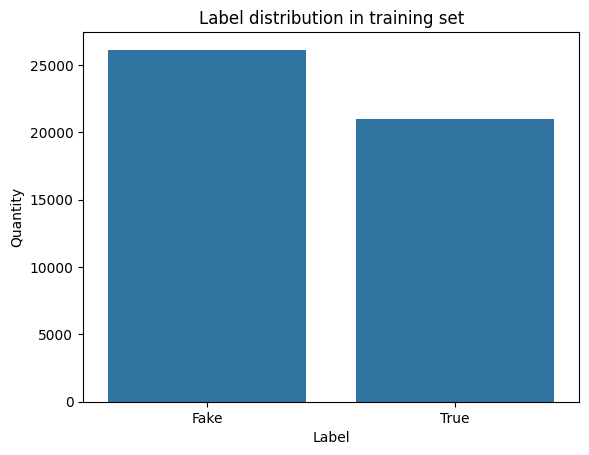

In [ ]:
sns.countplot(x='labels', data=train_data)
plt.xticks([0, 1], ['Fake', 'True'])
plt.title('Label distribution in training set')
plt.xlabel('Label')
plt.ylabel('Quantity')
plt.show()


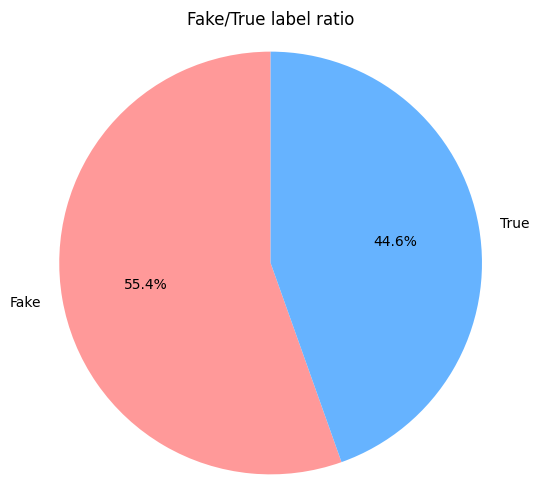

In [ ]:
label_counts = train_data['labels'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=['Fake', 'True'], autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'])
plt.title('Fake/True label ratio')
plt.axis('equal')
plt.show()


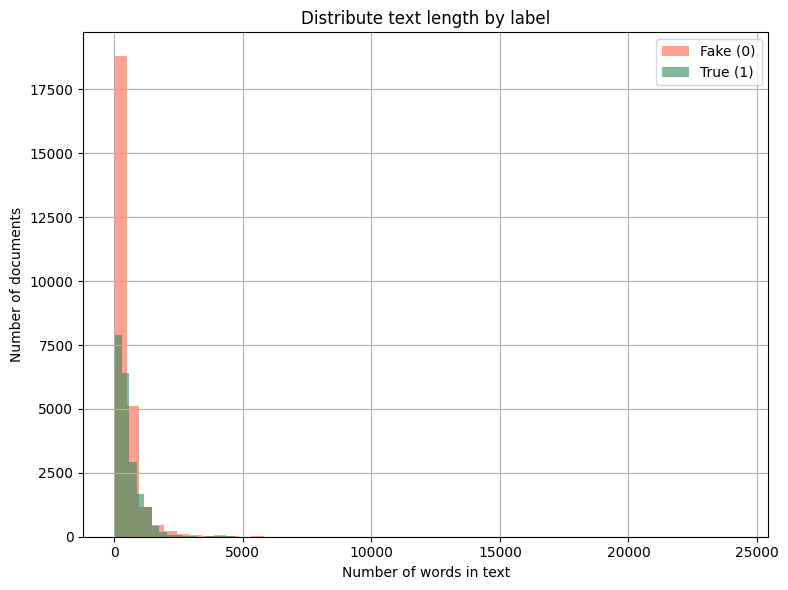

In [ ]:
#Distribute text length by label
train_data['text_length'] = train_data['text'].apply(lambda x: len(x.split()))

fake_lengths = train_data[train_data['labels'] == 0]['text_length']
real_lengths = train_data[train_data['labels'] == 1]['text_length']

plt.figure(figsize=(8, 6))
plt.hist(fake_lengths, bins=50, alpha=0.6, label='Fake (0)', color='tomato')
plt.hist(real_lengths, bins=50, alpha=0.6, label='True (1)', color='seagreen')

plt.xlabel('Number of words in text')
plt.ylabel('Number of documents')
plt.title('Distribute text length by label')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
#Join folder token
llm_path = os.path.join(path, 'token')

with open(os.path.join(llm_path, 'train.pkl'), 'rb') as f:
    train_tokens = pickle.load(f)

print(train_tokens[:1])

[['time', 'since', 'justice', 'antonin', 'scalias', 'passing', 'saturday', 'hardworking', 'folk', 'monkey', 'cage', 'already', 'done', 'yeoman', 'work', 'offering', 'five', 'separate', 'post', 'politics', 'volokh', 'conspiracy', 'outdone', 'post', 'topic', 'apology', 'takeaway', 'message', 'dont', 'disagree', 'single', 'thing', 'mike', 'bailey', 'wrote', 'monkey', 'cage', 'scotusblogs', 'tom', 'goldstein', 'wrote', 'game', 'strategy', 'obama', 'republican', 'senator', 'make', 'sense', 'savvy', 'political', 'supreme', 'court', 'nomination', 'process', 'sure', 'epic', 'debate', 'reading', 'however', 'one', 'small', 'teeny', 'tiny', 'detail', 'kept', 'nagging', 'matter', 'play', 'supreme', 'court', 'loses', 'hardworking', 'staff', 'spoiler', 'alert', 'banging', 'periodically', 'erosion', 'trust', 'american', 'political', 'institution', 'supreme', 'court', 'immune', 'trend', 'here', 'general', 'social', 'survey', 'data', 'fair', 'supreme', 'court', 'still', 'widely', 'respected', 'either',

In [ ]:
flat_tokens = [token for doc in train_tokens for token in doc]
total_tokens = len(flat_tokens)
print(f"Total words: {total_tokens:,}")

Total words: 12,628,144


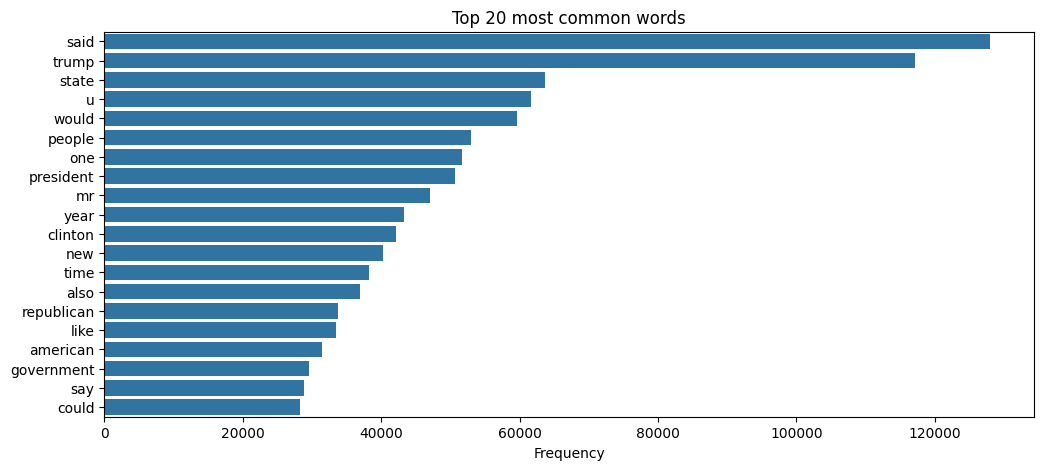

In [ ]:
# Frequency Counting
word_counter = Counter(flat_tokens)
# Top 20 most
most_common_20 = word_counter.most_common(20)

# Barplot
words, counts = zip(*most_common_20)
plt.figure(figsize=(12, 5))
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 20 most common words")
plt.xlabel("Frequency")
plt.show()

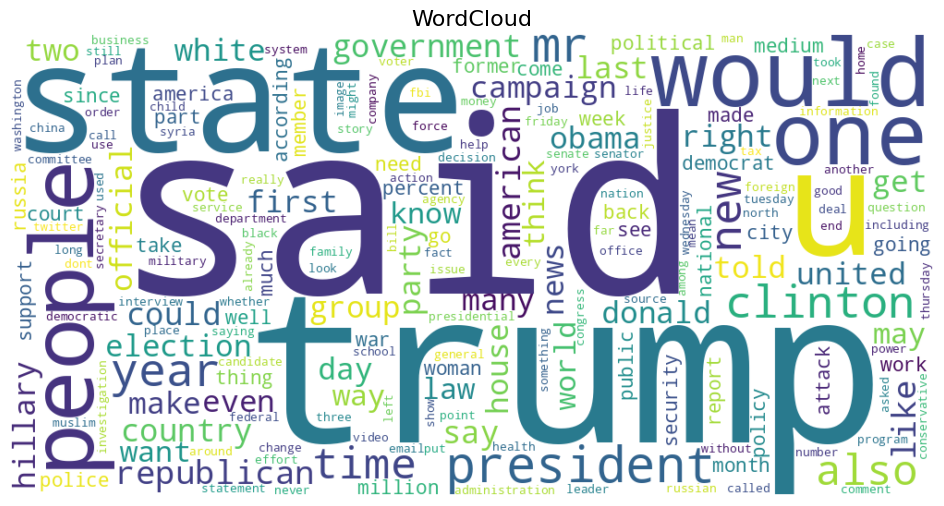

In [ ]:
# WordCloud
wc = WordCloud(width=1000, height=500, background_color='white', max_words=200).generate_from_frequencies(word_counter)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud", fontsize=16)
plt.show()


In [ ]:
over_01pct = sum(1 for word, count in word_counter.items() if count / total_tokens > 0.001)
over_001pct = sum(1 for word, count in word_counter.items() if count / total_tokens > 0.0001)

print(f"\nNumber of words with occurrence rate > 0.1%: {over_01pct:,}")
print(f"\nNumber of words with occurrence rate > 0.01%: {over_001pct:,}")


Number of words with occurrence rate > 0.1%: 108

Number of words with occurrence rate > 0.01%: 1,821


In [ ]:
# Bigram
bigram_counter = Counter(ngrams(flat_tokens, 2))
top_20_bigrams = bigram_counter.most_common(20)
print("\nTop 20 Bigrams:")
for bg, count in top_20_bigrams:
    print(f"{' '.join(bg):<25} {count:>5}")

# Trigram
trigram_counter = Counter(ngrams(flat_tokens, 3))
top_20_trigrams = trigram_counter.most_common(20)
print("\nTop 20 Trigrams:")
for tg, count in top_20_trigrams:
    print(f"{' '.join(tg):<35} {count:>5}")



Top 20 Bigrams:
donald trump              20424
united state              19307
white house               13085
hillary clinton           12909
mr trump                  11483
new york                  10743
last year                  5397
president donald           4707
last week                  4533
north korea                4314
secretary state            4116
trump said                 4029
president obama            4027
president trump            4025
supreme court              3977
fox news                   3923
barack obama               3900
islamic state              3858
prime minister             3795
national security          3793

Top 20 Trigrams:
president donald trump               4557
new york time                        3105
donald j trump                       2401
president barack obama               2095
u president donald                   1495
george w bush                        1426
new york city                        1283
st century wire                